### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [5]:
cotacoes_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2020-01-01', end='2020-11-10')['Adj Close']
    
display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,26.064989,35.616173,10.9650,18.078859,18.235773,38.093487,123.043831,146.925858,195.954865,NaN
2020-01-03,113.800003,140.899994,11.922435,26.078180,35.241554,11.0675,18.558996,18.288696,40.747009,124.516182,144.953705,195.954865,NaN
2020-01-06,112.589996,139.100006,11.932190,25.612377,34.717102,11.3500,18.627523,18.262236,39.882378,123.541115,146.491989,194.364441,NaN
2020-01-07,112.239998,139.399994,11.898049,25.167429,33.911690,11.2650,18.590338,18.335096,40.528366,123.706879,141.827835,195.120392,NaN
2020-01-08,111.949997,138.199997,12.263844,24.778097,33.359154,11.2125,18.683292,18.172602,40.737072,121.464226,137.528519,184.075821,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,15.984629,23.945601,14.4000,17.233248,18.344757,47.375851,104.819809,125.202530,155.487625,125.046341
2020-11-05,96.949997,115.900002,27.401571,16.231970,24.510721,14.6775,18.237125,19.155306,49.969746,104.819809,126.592903,155.291290,125.340195
2020-11-06,97.190002,117.510002,27.281780,16.193329,24.481976,14.7925,18.804127,19.365269,50.317589,104.673553,126.247765,155.546524,127.338440


### Será que todos os dados vieram corretos?

In [6]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   NTCO3   215 non-null    float64
 9   BCRI11  215 non-null    float64
 10  VILG11  215 non-null    float64
 11  KNRI11  215 non-null    float64
 12  XPLG11  110 non-null    float64
dtypes: float64(13)
memory usage: 23.5 KB


### Ajustando os dados

In [7]:
#df_media = cotacoes_carteira.mean()
#cotacoes_carteira = cotacoes_carteira.fillna(df_media)
cotacoes_carteira = cotacoes_carteira.ffill()
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   NTCO3   215 non-null    float64
 9   BCRI11  215 non-null    float64
 10  VILG11  215 non-null    float64
 11  KNRI11  215 non-null    float64
 12  XPLG11  110 non-null    float64
dtypes: float64(13)
memory usage: 23.5 KB


### Vamos ver como que as ações foram individualmente

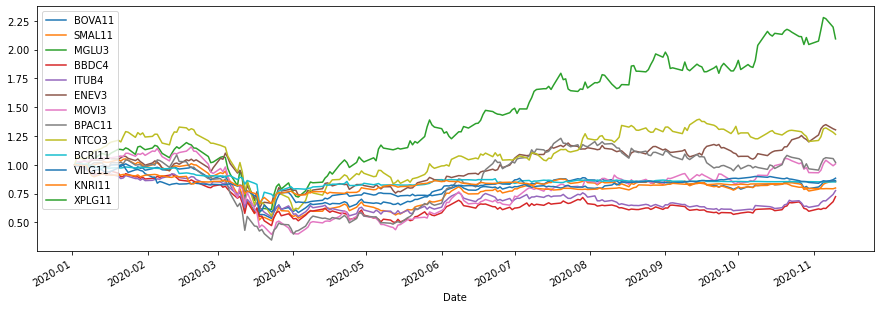

In [8]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15, 5))
plt.legend(loc='upper left')

### Vamos puxar o IBOV para comparar

In [9]:
cotacao_ibov = web.DataReader('^BVSP', data_source='yahoo', start='2020-01-01', end='2020-11-10')
display(cotacao_ibov)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573,115649,115652,118573,5162700,118573
2020-01-03,118792,117341,118564,117707,6834500,117707
2020-01-06,117707,116269,117707,116878,6570000,116878
2020-01-07,117076,115965,116872,116662,4854100,116662
2020-01-08,117335,115693,116667,116247,5910500,116247
...,...,...,...,...,...,...
2020-11-04,98296,95987,95992,97811,10704600,97811
2020-11-05,100922,97872,97873,100774,10455300,100774
2020-11-06,100928,99837,100751,100799,8382800,100799


### Criando um dataframe da Carteira com as quantidades de ações

In [10]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2606.498909,3561.617279,3289.500046,1807.885933,1823.577309,3809.348679,12304.383087,14692.585754,19595.486450,NaN
2020-01-03,11380.000305,14089.999390,11922.434807,2607.818031,3524.155426,3320.250034,1855.899620,1828.869629,4074.700928,12451.618195,14495.370483,19595.486450,NaN
2020-01-06,11258.999634,13910.000610,11932.189941,2561.237717,3471.710205,3405.000114,1862.752342,1826.223564,3988.237762,12354.111481,14649.198914,19436.444092,NaN
2020-01-07,11223.999786,13939.999390,11898.049355,2516.742897,3391.168976,3379.500103,1859.033775,1833.509636,4052.836609,12370.687866,14182.783508,19512.039185,NaN
2020-01-08,11194.999695,13819.999695,12263.843536,2477.809715,3335.915375,3363.749886,1868.329239,1817.260170,4073.707199,12146.422577,13752.851868,18407.582092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1598.462868,2394.560051,4319.999886,1723.324776,1834.475708,4737.585068,10481.980896,12520.252991,15548.762512,12504.634094
2020-11-05,9694.999695,11590.000153,27401.571274,1623.196983,2451.072121,4403.249931,1823.712540,1915.530586,4996.974564,10481.980896,12659.290314,15529.129028,12534.019470
2020-11-06,9719.000244,11751.000214,27281.780243,1619.332886,2448.197556,4437.749863,1880.412674,1936.526871,5031.758881,10467.355347,12624.776459,15554.652405,12733.843994


### Comparação Carteira x IBOV

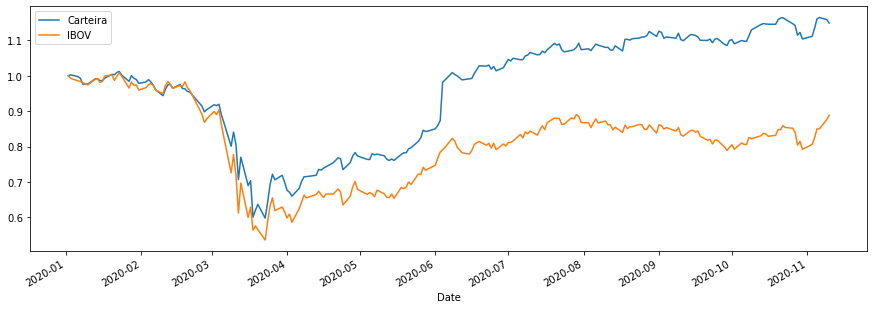

In [11]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira')
cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()

In [12]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno da Carteira: {:.2%}'.format(retorno_carteira))
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno da Carteira: 14.89%
Retorno IBOV: -11.15%


### Correlação da Carteira com o IBOV

In [13]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(correlacao)

0.7057656971021437
